In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### The goal of this file will be to make an exploratory analysis of the speaker attributes parquet file (already treated)

We are interested in understanding the dataset, finding missing values and plotting the distribution for some of the features

In [2]:
speaker_attributes = pd.read_parquet("data/speaker_attributes_updated.parquet")

speaker_attributes.head(10)

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Great Britain, United States of America]",[male],1395141751,None,W000178,"[politician, military officer, farmer, cartogr...",[independent politician],None,Q23,George Washington,"[1792 United States presidential election, 178...",item,[Episcopal Church]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[United Kingdom],[male],1395737157,[White British],None,"[playwright, screenwriter, novelist, children'...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Belgium],[male],1380367296,None,None,"[writer, lawyer, librarian, information scient...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[United States of America],[male],1395142029,None,None,"[politician, motivational speaker, autobiograp...",[Republican Party],None,Q207,George W. Bush,"[2000 United States presidential election, 200...",item,"[United Methodist Church, Episcopal Church, Me..."
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Spain],[male],1391704596,None,None,[painter],None,None,Q297,Diego Velázquez,None,item,None
5,"[Augusto Pinochet Ugarte, Augusto José Ramón P...",[+1915-11-25T00:00:00Z],[Chile],[male],1392242213,None,None,"[military officer, politician]",[independent politician],None,Q368,Augusto Pinochet,None,item,[Catholicism]
6,"[Baudelaire, Charles Pierre Baudelaire-Dufaÿs,...",[+1821-04-09T00:00:00Z],[France],[male],1386699038,[French],None,"[poet, art critic, essayist, translator, write...",None,None,Q501,Charles Baudelaire,None,item,[Catholicism]
7,"[Mikołaj Kopernik, Nikolaus Kopernikus, Copern...",[+1473-02-19T00:00:00Z],[Kingdom of Poland],[male],1394975677,[Poles],None,"[astronomer, jurist, economist, mathematician,...",None,None,Q619,Nicolaus Copernicus,None,item,[Catholicism]
8,"[Neil Percival Young, Shakey, Godfather of Gru...",[+1945-11-12T00:00:00Z],"[Canada, United States of America]",[male],1395459626,None,None,"[singer, singer-songwriter, film director, mus...",None,None,Q633,Neil Young,None,item,None
9,None,[+1969-00-00T00:00:00Z],[Germany],[male],1340253739,None,None,"[photographer, Wikimedian]",None,None,Q640,Harald Krichel,None,item,None


In [3]:
## What is the size of the dataframe ?
print(speaker_attributes.shape)

(9055981, 15)


Since the dataframe is very big (almost one million rows) we will analyse one sample of 10000 rows instead of the full dataframe to speed up operations.

In [4]:
df_sample = speaker_attributes.sample(10000)
del(speaker_attributes) # we don't want to have it in memory

In [5]:
df_sample

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
6231805,None,None,None,None,1345659106,None,None,[researcher],None,None,Q57479446,Christian Ihle,None,item,None
3204265,None,[+1989-01-03T00:00:00Z],None,[female],1199633506,None,None,None,None,None,Q95202327,Kim Liersch,None,item,None
1582022,None,[+1846-08-07T00:00:00Z],None,[male],1320872987,None,None,[physician],None,None,Q39791211,Patrick Henry Cronin,None,item,None
6042820,None,[+1965-06-28T00:00:00Z],[Sri Lanka],[male],1319566346,None,None,[cricketer],None,None,Q22958649,Dhamika Bulankulame,None,item,None
1220612,"[François Marie Susanne, francois-marie suzann...",[+1750-01-01T00:00:00Z],[France],[male],1396133112,None,None,[sculptor],None,None,Q3083570,François Marie Suzanne,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406220,None,[+1873-01-29T00:00:00Z],[Thailand],None,1022384380,None,None,None,None,None,Q13017961,None,None,item,[Buddhism]
8589178,None,None,None,[male],995816115,None,None,None,None,None,Q65890191,Fang Dazhong,None,item,None
5822985,None,[+1984-12-03T00:00:00Z],[Ecuador],[male],1395965355,None,None,[association football player],None,None,Q5996376,Marco Mosquera,None,item,None
5029674,None,None,[Yuan Empire],[male],985556429,None,None,None,None,None,Q45708064,Wu Anyuan,None,item,None


As we can see there are a lot of speakers without any alias, how many ?

### Aliases

In [6]:
def count_none_values(attribute_name):
    count=0
    for el in df_sample[attribute_name].values:
        if type(el) == np.ndarray: ## We count the not None elements
            count = count+1
    print('the number of None values is', 10000-count)

In [7]:
count_none_values('aliases')

the number of None values is 8625


We have a lot of missing values, we expect a great number of missing values in the whole speaker attributes file too, what about the nationality ?

### Nationality

In [8]:
count_none_values('nationality')

the number of None values is 5849


This is a huge number too. Which are the most frequents nationalies (removing the None values) ?

In [9]:
def remove_none_values(attribute_name):
    list_ = []
    for ls in df_sample[attribute_name].values:
        if type(ls) == np.ndarray: #We count the not None elements
            for el in ls: #we unpack the list appending one element at the time
                list_.append(el)
    return list_

In [10]:
## We remove the None values
list_nat = remove_none_values('nationality')

In [11]:
# we create a dataframe for visualization:
df_visual = pd.DataFrame({'nat': list_nat, 'count':np.ones(len(list_nat))})
df_visual.groupby(by = 'nat').count().sort_values('count', ascending=False)[0:10]

,count
nat,
United States of America,492
France,300
Germany,292
Japan,210
United Kingdom,175
Spain,160
Ming dynasty,131
Soviet Union,113
Italy,98


These are the most common nationalities

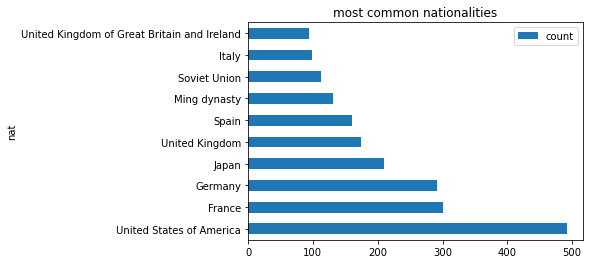

In [12]:
data = df_visual.groupby(by = 'nat').count().sort_values('count', ascending=False)[0:10].plot(kind = 'barh')
plt.title('most common nationalities')
plt.show()

Another attribute we are interested in (for our task is the gender), it could be interested to notice if there are more males speaking about politics than females (we will of course make this analysis in milestone 3), now let us focus on the distribution of the gender for the whole speaker attributes sample.

### Gender

How many missing values ?

In [13]:
count_none_values('gender')

the number of None values is 2138


This time we have a bit less missing values, let us see how is the distribution of the gender.

In [14]:
list_gen = remove_none_values('gender')

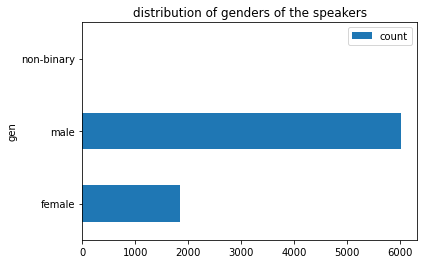

In [15]:
# we create a dataframe for visualization:
df_visual = pd.DataFrame({'gen': list_gen, 'count':np.ones(len(list_gen))})
df_visual.groupby(by = 'gen').count().plot(kind = 'barh')
plt.title('distribution of genders of the speakers')
plt.show()

The majority of the speakers are males (the number of male speakers is 3 times the number of female ones)

Another question which might arise spontanously is the following. What are the most common occupations of the speakers ? Indeed, it could be interesting to understand if people doing a certain job are more inc

### Occupations

In [16]:
count_none_values('occupation')

the number of None values is 2984


In [17]:
list_occ = remove_none_values('occupation')

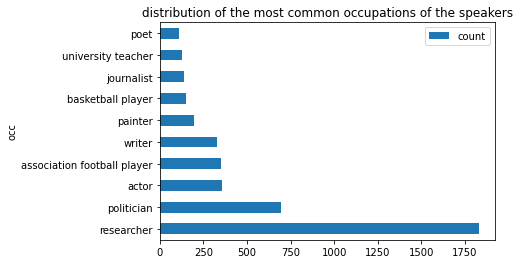

In [18]:
# we create a dataframe for visualization:
df_visual = pd.DataFrame({'occ': list_occ, 'count':np.ones(len(list_occ))})
df_visual.groupby(by = 'occ').count().sort_values('count', ascending=False)[0:10].plot(kind='barh' )
plt.title('distribution of the most common occupations of the speakers')
plt.show()

Reasearchers are the most frequent speaker in the parquet file.

Finally, for our purpose, it could be interesting to understand how many missing value we have for the degree attribute and how is the distribution of this feature, indeed it could be interesting to see which people tend to speak more about a politician (people with/without degree). However, to do so, we have to consider before how many people in general have a degree in the attribute_speaker dataset. 

### Degree

In [19]:
count_none_values('academic_degree')

the number of None values is 9895


We have too few non NaN values in this column for a meaningful analysis. However, let us try at least to understand how is the distribution for this feature.

In [20]:
list_degree = remove_none_values('academic_degree')

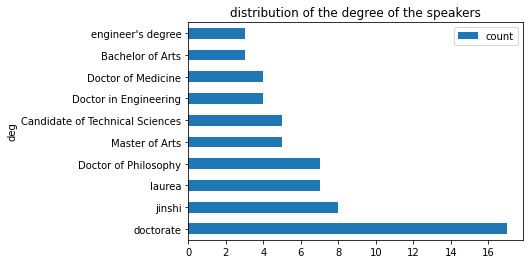

In [21]:
# we create a dataframe for visualization:
df_visual = pd.DataFrame({'deg': list_degree, 'count':np.ones(len(list_degree))})
df_visual.groupby(by = 'deg').count().sort_values('count', ascending=False)[0:10].plot(kind='barh' )
plt.title('distribution of the degree of the speakers')
plt.show()

The majority of them has a doctorate (this relates to the fact that the majority of them were researchers).

### Conclusions

In this notebook we made some exploratory data analysis on the speaker attributes dataframe. These analysis can be meaningful because we plan to compare them with similar analysis but for a subset of the speaker attributes data: we would like to repeat similar analysis for speakers whose quotes are referring to Trump/Clinton in order to see if there are noticeable differences.